# <h1><center>Sales Store Data Analysis</center></h1>
<div>
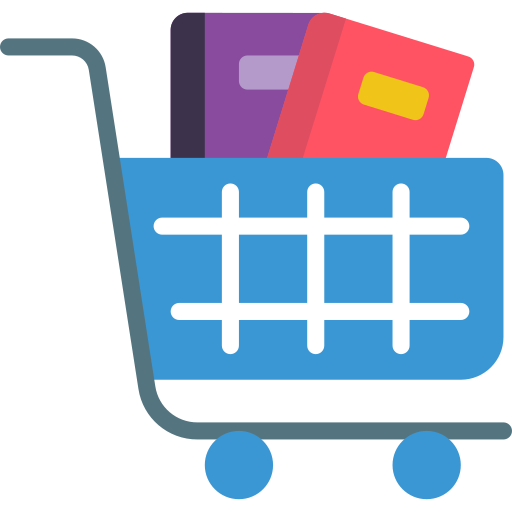
</div>

In [213]:
# Data Analysis 
import pandas as pd

# Data Visualization
import matplotlib.pylab as plt 
import seaborn as sns

# Linear Algebra
import numpy as np

In [214]:
df=pd.read_excel(r"C:\Users\Levi\Desktop\Sales Store\Salesstore2.xlsx")
df.head(2)

,Order_ID,Order Date,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,2021-02-19,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,2021-12-23,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box


In [215]:
df.shape

(730, 14)

In [216]:
df.describe()

,Order_ID,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000,730.000000
mean,29721.597260,24.857534,1502.777653,207.479233
std,17350.560439,14.182970,2893.936648,878.631028
min,35.000000,1.000000,8.600000,-4437.910000
25%,14479.000000,13.000000,171.098375,-77.132500
50%,29350.500000,25.000000,438.700000,0.035000
75%,44978.500000,37.000000,1480.855000,180.000000
max,59909.000000,50.000000,27663.920000,8417.570000


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order_ID              730 non-null    int64         
 1   Order Date            730 non-null    datetime64[ns]
 2   Order_Priority        730 non-null    object        
 3   Order_Quantity        730 non-null    int64         
 4   Sales                 730 non-null    float64       
 5   Ship_Mode             730 non-null    object        
 6   Profit                730 non-null    float64       
 7   Customer_Name         730 non-null    object        
 8   Region                730 non-null    object        
 9   Customer_Segment      730 non-null    object        
 10  Product_Category      730 non-null    object        
 11  Product_Sub-Category  730 non-null    object        
 12  Product_Name          730 non-null    object        
 13  Product_Container   

In [218]:
# check for na values
df.isna().sum()

Order_ID                0
Order Date              0
Order_Priority          0
Order_Quantity          0
Sales                   0
Ship_Mode               0
Profit                  0
Customer_Name           0
Region                  0
Customer_Segment        0
Product_Category        0
Product_Sub-Category    0
Product_Name            0
Product_Container       0
dtype: int64

# Cleaning Data

In [219]:
# date parser 
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order Date'].dtype

dtype('<M8[ns]')

# Feature Engineering

In [220]:
# add Month Feature
df['Month']=df['Order Date'].dt.month

In [221]:
# Calculate the Cost 
df['Cost']=df['Sales'] - df['Profit'] 
df.head(2)

,Order_ID,Order Date,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Month,Cost
0,643,2021-02-19,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,2,3477.08
1,8995,2021-12-23,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box,12,2651.99


# EDA

<AxesSubplot:>

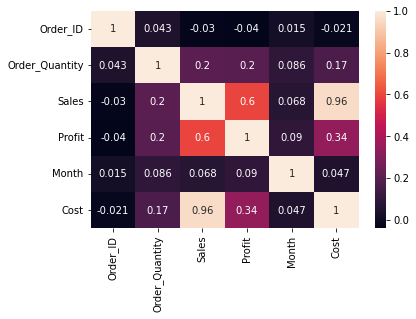

In [222]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [223]:
df_features=df.columns
df_features

Index(['Order_ID', 'Order Date', 'Order_Priority', 'Order_Quantity', 'Sales',
       'Ship_Mode', 'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container', 'Month', 'Cost'],
      dtype='object')

In [224]:
# get the relation between all features
corr_df=df.copy()
for i in df_features:
    corr_df[i]=corr_df[i].astype('category').cat.codes

corr_df.corr()

,Order_ID,Order Date,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Month,Cost
Order_ID,1.000000,0.018799,-0.008035,0.043747,-0.053168,-0.017498,-0.015718,0.008092,-0.037704,0.031814,-0.011944,0.009920,-0.023948,-0.022976,0.016615,-0.051373
Order Date,0.018799,1.000000,0.022648,0.082957,0.041135,0.013278,0.010674,0.007259,0.007969,0.022191,0.000681,0.022793,0.002098,0.031167,0.996280,0.049864
Order_Priority,-0.008035,0.022648,1.000000,0.002038,0.008244,0.030184,0.066432,0.012880,0.085153,0.018938,0.007393,0.010996,-0.051747,-0.010394,0.023957,-0.003493
Order_Quantity,0.043747,0.082957,0.002038,1.000000,0.421994,0.009184,0.178381,0.057858,-0.017581,0.035359,0.011133,0.065394,0.048322,0.043683,0.086218,0.409716
Sales,-0.053168,0.041135,0.008244,0.421994,1.000000,-0.111569,0.464156,0.029957,-0.051804,0.073653,0.255068,0.243831,-0.033979,-0.290503,0.041716,0.969452
Ship_Mode,-0.017498,0.013278,0.030184,0.009184,-0.111569,1.000000,-0.030353,0.019992,0.003563,-0.379083,0.005511,-0.087684,-0.013303,0.018628,0.012194,-0.105898
Profit,-0.015718,0.010674,0.066432,0.178381,0.464156,-0.030353,1.000000,-0.003049,-0.019420,0.056159,0.071931,-0.005098,-0.075170,0.089802,0.017591,0.302931
Customer_Name,0.008092,0.007259,0.012880,0.057858,0.029957,0.019992,-0.003049,1.000000,0.328101,-0.057723,0.020961,-0.015968,-0.011100,0.032308,0.002317,0.033151
Region,-0.037704,0.007969,0.085153,-0.017581,-0.051804,0.003563,-0.019420,0.328101,1.000000,-0.025567,-0.013568,0.002282,0.017959,0.096149,0.008255,-0.054505
Customer_Segment,0.031814,0.022191,0.018938,0.035359,0.073653,-0.379083,0.056159,-0.057723,-0.025567,1.000000,0.013747,0.048579,0.076475,-0.039334,0.023289,0.074006


In [225]:
for i in df_features:
    print("NO. Unique Values in Feature --",i,"-- is --->",len(df[i].value_counts()))

NO. Unique Values in Feature -- Order_ID -- is ---> 571
NO. Unique Values in Feature -- Order Date -- is ---> 315
NO. Unique Values in Feature -- Order_Priority -- is ---> 5
NO. Unique Values in Feature -- Order_Quantity -- is ---> 50
NO. Unique Values in Feature -- Sales -- is ---> 729
NO. Unique Values in Feature -- Ship_Mode -- is ---> 2
NO. Unique Values in Feature -- Profit -- is ---> 727
NO. Unique Values in Feature -- Customer_Name -- is ---> 173
NO. Unique Values in Feature -- Region -- is ---> 6
NO. Unique Values in Feature -- Customer_Segment -- is ---> 4
NO. Unique Values in Feature -- Product_Category -- is ---> 3
NO. Unique Values in Feature -- Product_Sub-Category -- is ---> 15
NO. Unique Values in Feature -- Product_Name -- is ---> 445
NO. Unique Values in Feature -- Product_Container -- is ---> 3
NO. Unique Values in Feature -- Month -- is ---> 12
NO. Unique Values in Feature -- Cost -- is ---> 721


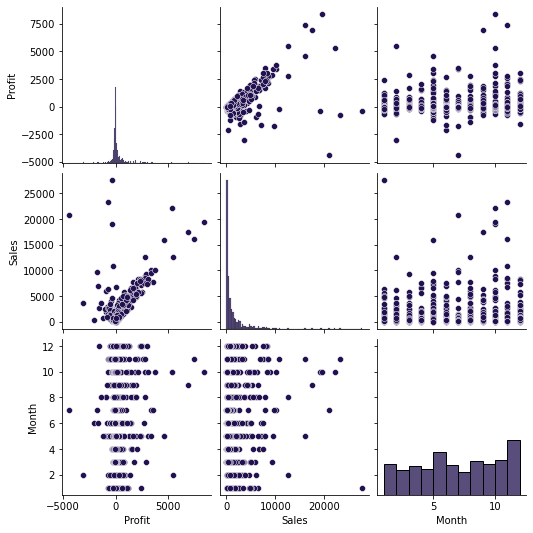

In [226]:
sns.set_palette('magma')
sns.pairplot(df[["Profit","Sales","Month"]])

()

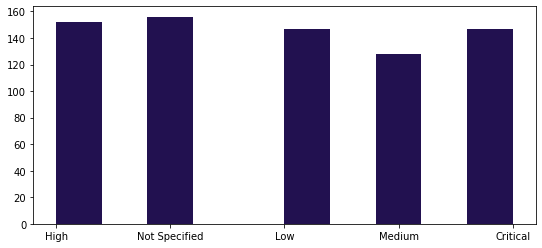

In [227]:
# Order Priorty Dist
plt.figure(figsize=(9,4))
sns.set_palette('magma')
plt.hist(df['Order_Priority'])[3:]

<AxesSubplot:xlabel='Sales', ylabel='Count'>

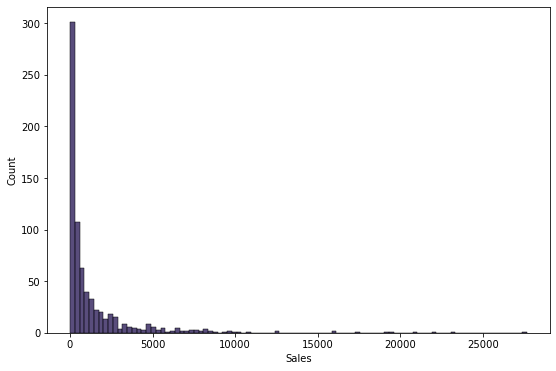

In [228]:
# Sales Distrinution
plt.figure(figsize=(9,6))
sns.set_palette('magma')
sns.histplot(df['Sales'])

<AxesSubplot:xlabel='Profit', ylabel='Count'>

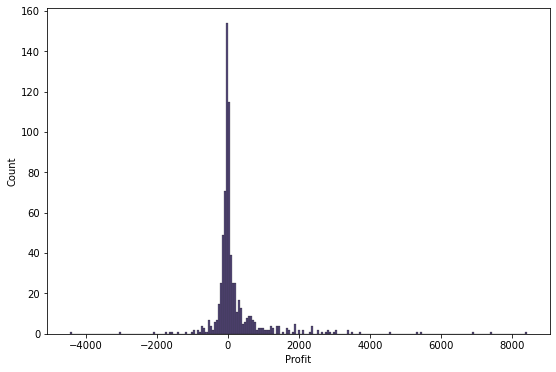

In [229]:
# Sales Distrinution
plt.figure(figsize=(9,6))
sns.set_palette('magma')
sns.histplot(df['Profit'])

<AxesSubplot:xlabel='Product_Container', ylabel='Count'>

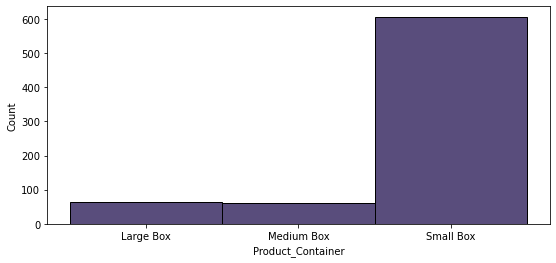

In [230]:
# Product_Container Dist
plt.figure(figsize=(9,4))
sns.set_palette('magma')
sns.histplot(df['Product_Container'])

C:\Users\Levi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Segment', ylabel='count'>

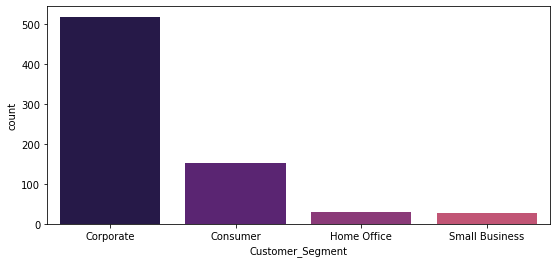

In [231]:
# Customer_Segment Dist
plt.figure(figsize=(9,4))
sns.set_palette('magma')
sns.countplot(df['Customer_Segment'])

In [232]:
for i in df_features:
    if len(df[i].value_counts())<12:
        print(f"Feature {i} : {df[i].unique()}")

Feature Order_Priority : ['High' 'Not Specified' 'Low' 'Medium' 'Critical']
Feature Ship_Mode : ['Express Air' 'Regular Air']
Feature Region : ['Nunavut' 'Northwest Territories' 'Atlantic' 'West' 'Ontario' 'Prarie']
Feature Customer_Segment : ['Corporate' 'Consumer' 'Home Office' 'Small Business']
Feature Product_Category : ['Office Supplies' 'Furniture' 'Technology']
Feature Product_Container : ['Large Box' 'Medium Box' 'Small Box']


# Data Analysis

### Q1:) Highest Top 5 Months with high Sales ?

In [233]:
q1=df.groupby('Month')['Sales'].sum()
q1

Month
1     101817.9200
2      69845.0085
3      60686.0260
4      54398.4180
5     128493.4165
6      69699.4990
7      69225.9380
8      88045.6815
9      86684.8810
10    151114.6975
11    126964.2770
12     90051.9240
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

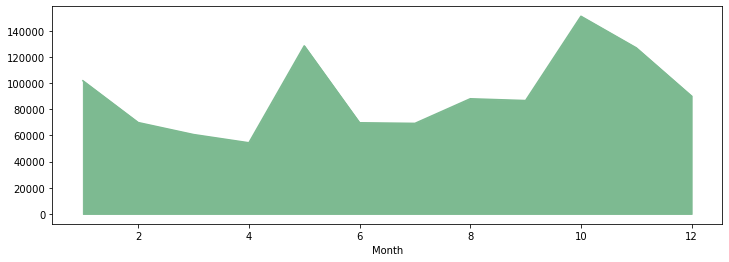

In [234]:
plt.figure(figsize=(12,4))
sns.set_palette('crest')
q1.plot.area()

Highest Top 5 Months in Sales : [JAN , MAY , OCT , NOV , DEC]

### Q2:) Highest Top 5  Months with high Profit ?

Month
10    30999.72
11    22813.30
5     19890.92
9     17264.49
12    15775.35
8     10552.56
3      9261.02
2      8450.43
1      7412.01
4      5434.55
6      2063.02
7      1542.47
Name: Profit, dtype: float64


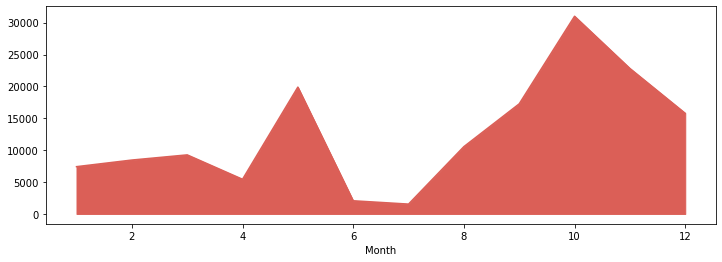

In [235]:
q2=df.groupby('Month')['Profit'].sum()
plt.figure(figsize=(12,4))
sns.set_palette('hls')
q2.plot.area()
print(q2.sort_values(ascending=False))

Highest Top 5 Months in Profit: [Oct , Nov , May , Sep , Dec]

### Q3:) there is any loss in any month?

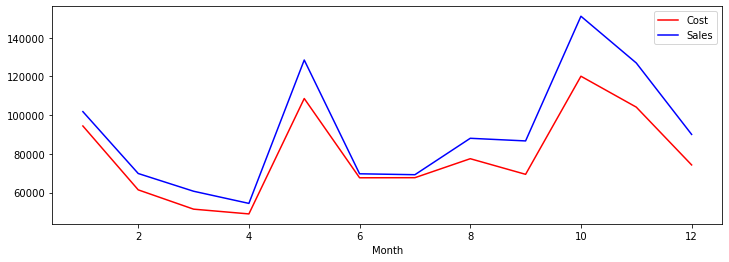

In [236]:
plt.figure(figsize=(12,4))

q_cost=df.groupby('Month')['Cost'].sum()
q_revenue=df.groupby('Month')['Sales'].sum()

q_cost.plot(color="red")
q_revenue.plot(color="blue")

plt.legend()

Ans : No there is not

### Q4:) What is the profit per Product_Category ? what is the most Product C that gives us the highest profit? 

Product_Category
Technology         81368.05
Office Supplies    53073.95
Furniture          17017.84
Name: Profit, dtype: float64


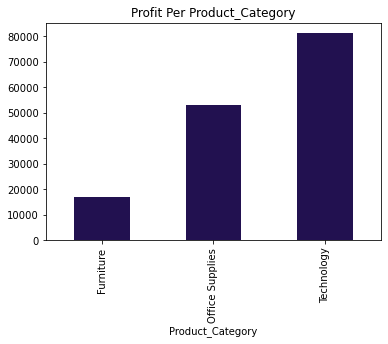

In [237]:
q4=df.groupby('Product_Category')['Profit'].sum()
sns.set_palette('magma')
q4.plot.bar()
plt.title('Profit Per Product_Category')
print(q4.sort_values(ascending=False))

 Highest Profit Product Cat is : "Technology"

In [238]:
df.columns

Index(['Order_ID', 'Order Date', 'Order_Priority', 'Order_Quantity', 'Sales',
       'Ship_Mode', 'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container', 'Month', 'Cost'],
      dtype='object')

### Q5:) What is the Loss per Product Category ?

Product_Category
Furniture          -8885.39
Technology        -21780.60
Office Supplies   -33649.70
Name: Profit, dtype: float64


Text(0.5, 1.0, 'Profit Per Product_Category')

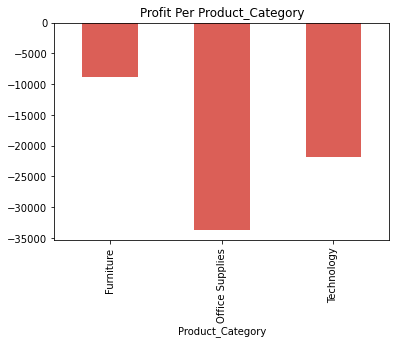

In [239]:
df3=df[df['Profit']<0]
q5=df3.groupby('Product_Category')['Profit'].sum()
print(q5.sort_values(ascending=False))
sns.set_palette('hls')
q5.plot.bar()
plt.title('Profit Per Product_Category')

The Highest Loss Category is : "Office Supplies" with ~33649.70~ loss

### Q6:) What is the Avg Sales Per Customer_Segment?

Customer_Segment
Home Office       2269.778371
Corporate         1554.716456
Small Business    1260.007589
Consumer          1215.955693
Name: Sales, dtype: float64


<AxesSubplot:xlabel='Customer_Segment'>

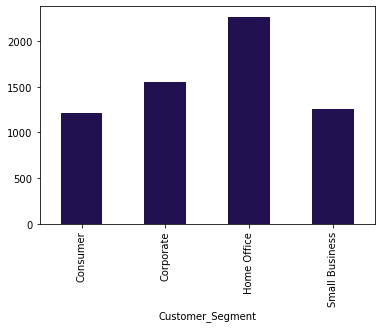

In [240]:
sns.set_palette('magma')
q6=df.groupby('Customer_Segment')['Sales'].mean()
print(q6.sort_values(ascending=False))
q6.plot.bar()

Home Office :    2269.778371 \
Corporate :      1554.716456 \
Small Business : 1260.007589 \
Consumer :       1215.955693

### Q7:) What is the total profit for every Ship_mode? 

Ship_Mode
Regular Air    118300.72
Express Air     33159.12
Name: Profit, dtype: float64


<AxesSubplot:xlabel='Ship_Mode'>

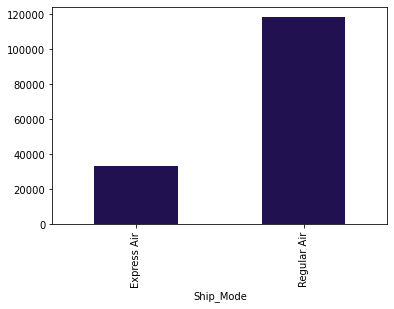

In [241]:
q7=df.groupby('Ship_Mode')['Profit'].sum()
print(q7.sort_values(ascending=False))
q7.plot.bar()

Regular Air  :  118300.72 \
Express Air   :  33159.12

### Q8:) What are the top 10 customers and products in sales?

Customer_Name
Jack Lebron          48039.1190
Sylvia Foulston      38759.6975
Tony Chapman         35041.5600
Lela Donovan         30470.7105
Erica Bern           30340.9735
Hilary Holden        29313.2030
Roy Skaria           24933.3330
Charles McCrossin    24622.4500
Sally Knutson        24378.2500
Grant Carroll        22878.2835
Name: Sales, dtype: float64


<AxesSubplot:xlabel='Customer_Name'>

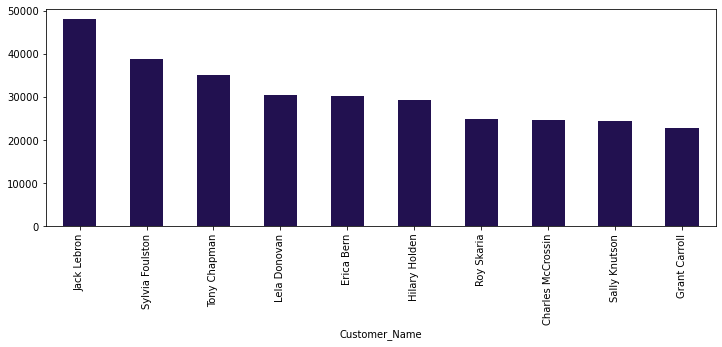

In [242]:
q8=df.groupby('Customer_Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12,4))
print(q8.sort_values(ascending=False))
q8.plot.bar()

Product_Name
Sharp AL-1530CS Digital Copier                                                 49832.5900
Canon PC1060 Personal Laser Copier                                             39909.2300
Canon imageCLASS 2200 Advanced Copier                                          31336.8100
2160i                                                                          24917.7075
Hoover WindTunnelâ„¢ Plus Canister Vacuum                                      23514.3200
Canon Image Class D660 Copier                                                  23255.6100
Polycom ViewStationâ„¢ Adapter H323 Videoconferencing Unit                     22079.4700
T28 WORLD                                                                      20928.2665
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    19417.5500
Canon MP41DH Printing Calculator                                               18504.5900
Name: Sales, dtype: float64


<AxesSubplot:xlabel='Product_Name'>

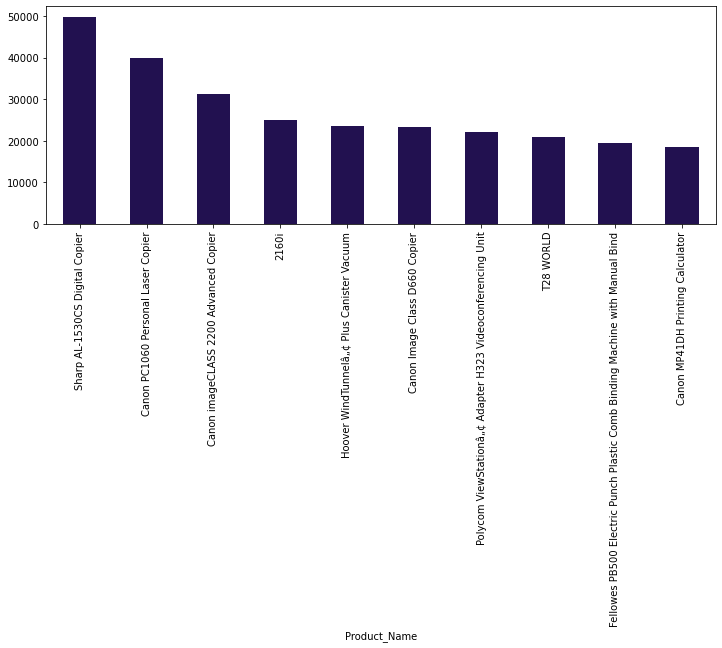

In [243]:
q8_2=df.groupby('Product_Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12,4))

print(q8_2.sort_values(ascending=False))
q8_2.plot.bar()